# Python Assignment 4

ECE 7995_1801_003: Detection and Estimation 
Submitted By: Prabhjot Kaur

Multiple Hypothesis Testing using MNIST dataset

In [232]:
import numpy as np
from scipy import linalg
from sklearn import datasets
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

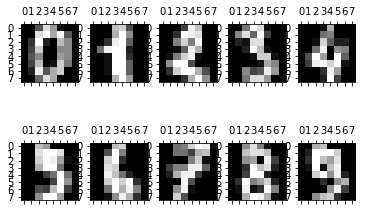

In [233]:
#### Q1 Repeat steps (1)-(3) for PA#2, except this time learn the mean and likelihood function for all ten classes '0' to '9'. 
#       Display a sample image from each class.
digits = datasets.load_digits()
mu_flattened = np.zeros((10,64)) #to store the mean of ten classes as row vectors 

#display sample image from each of the 10 classes
fig, axes = plt.subplots(2,5)
for j in range(0,2):
    for i in range(0,5):
        if j == 0:
            axes[j,i].matshow(digits.images[i])
        elif j ==1:
            axes[j,i].matshow(digits.images[i+5])

#learn the mean for each of the 10 classes
for label in range(0,10):
    index = digits.target == label
    images = digits.images[index]
    mu= np.mean(images,0)
    mu_flattened[label,:] = np.reshape(mu,-1)

# Build the gaussian likelihood fucntions for these classes
# This is included in the next part of this assignment

In [234]:
#### Q2 For sigma^2 = 1000, derive the *maximum-likelihood* detector. 
#       Drawing 1000 samples randomly and uniformly from the classes, compute empirically the probability of error. 
#       You may find it convenient to use a for loop over all the classes to implement the ML detector.

sigma_2 = 1000
sample_size = 1000;
cov = np.dot(sigma_2,np.eye(mu_flattened[0,:].shape[0])) # Covaraince 
closeness2mean = np.zeros((1,10))
P_err = 0;
P_det = 0

for k in range(0, sample_size):
    rand_sample_index = np.random.choice(10,size=1) #choose the hypothesis to draw the sample from (assumes uniform distribution over 10 classes)
    y = np.random.multivariate_normal(mu_flattened[int(rand_sample_index),:],cov) #draw a sample from the class index given by random.choice
                 
    for classes in range (0,10):
        cmprWithMean = np.square(np.linalg.norm(y-mu_flattened[classes,:])) #how far is y from the the mean of class=classes
        closeness2mean[0,classes] = cmprWithMean
    
    #maximum likelihood detector
    maxLikelihood_idx = np.argmin(closeness2mean)
        
    # Find the probability of error
    if [maxLikelihood_idx] != rand_sample_index:
        P_err =  P_err + 1/sample_size
    else:
        P_det =  P_det + 1/sample_size


print('The probability of error and detection probability for the ML detector are =', P_err,' and',P_det,',respectively')
    



The probability of error and detection probability for the ML detector are = 0.7740000000000006  and 0.22600000000000017 ,respectively


[[0.035  0.0044 0.0063 0.0067 0.0129 0.01   0.0113 0.0067 0.0038 0.0085]
 [0.0072 0.0233 0.0094 0.0071 0.0127 0.0058 0.0104 0.0107 0.0067 0.0061]
 [0.0082 0.007  0.0284 0.01   0.0051 0.0078 0.0115 0.01   0.0054 0.0073]
 [0.0105 0.0083 0.0126 0.0244 0.0046 0.0114 0.0066 0.0095 0.0048 0.0103]
 [0.0109 0.0097 0.0052 0.0035 0.0313 0.0057 0.0138 0.0117 0.004  0.0048]
 [0.0098 0.0071 0.0088 0.0095 0.0093 0.0245 0.0081 0.0091 0.0028 0.008 ]
 [0.0118 0.0062 0.0087 0.0062 0.0116 0.0065 0.0322 0.0063 0.0032 0.006 ]
 [0.0081 0.0082 0.0081 0.0068 0.0109 0.0062 0.006  0.035  0.0055 0.0063]
 [0.01   0.0094 0.0115 0.0083 0.0085 0.0085 0.0106 0.0127 0.0102 0.0067]
 [0.0132 0.0062 0.009  0.0115 0.0058 0.0082 0.0072 0.0096 0.0035 0.0233]]


Text(0.5,0,'predicted class')

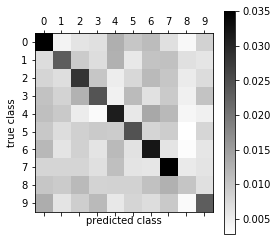

In [235]:
#### Q3 Next, you will compute the *confusion matrix* of the detector. 
#       The confusion matrix tells how often class i is confused for class j in a detector. 
#       In this case, you will build a 10x10 matrix where the (i,j)th element displays the fraction of the times that an image that comes from class i is "confused" as an image from class j. 
#       Each matrix entry should be between zero and one. For sigma^2 = 1000, draw 10,000 samples randomly and uniformly from the classes and compute the confusion matrix. 
#       What do you see? Are some classes more easily confused than others? Why?

sigma_2 = 1000
sample_size = 10000
cov = np.dot(sigma_2,np.eye(mu_flattened[0,:].shape[0])) # Covaraince
conf_matrix = np.zeros((10,10))
cmprWithMean = 0
closeness2mean = np.zeros((1,10))

#true_class = np.zeros((1,sample_size))
#pred_class = np.zeros((1,sample_size))

for k in range(0, sample_size):
    rand_sample_index = np.random.choice(10,size=1) #choose the hypothesis to draw the sample from (assumes uniform distribution over 10 classes)
    y = np.random.multivariate_normal(mu_flattened[int(rand_sample_index),:],cov) #draw a sample from the class index given by random.choice
    
    for classes in range (0,10):
        cmprWithMean = np.square(np.linalg.norm(y-mu_flattened[classes,:])) #how far is y from the the mean of class=classes
        closeness2mean[0,classes] = cmprWithMean
    
    #maximum likelihood detector
    maxLikelihood_idx = np.argmin(closeness2mean)
    
    #true_class[0,k]= rand_sample_index 
    #pred_class[0,k]= maxLikelihood_idx
    
    #Confusion matrix
    conf_matrix[rand_sample_index,maxLikelihood_idx] = conf_matrix[rand_sample_index,maxLikelihood_idx] +1

normalized_confmtrx = conf_matrix/sample_size
print(normalized_confmtrx)

#confusion matrix using sklearn confusion_matrix fucntion
#C = confusion_matrix(np.transpose(true_class), np.transpose(pred_class))
#print('Using sk learn')
#print(C/sample_size)

plt.matshow(normalized_confmtrx, cmap=plt.cm.gray_r)
plt.colorbar()
tick_marks = np.arange(0,10)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.ylabel('true class')
plt.xlabel('predicted class')



In [ ]:
# From the confusion matrix, we see that classes 8 and 9 less confused with other classes.

[[1.004e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 9.800e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.006e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.056e-01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 2.000e-04]
 [0.000e+00 1.000e-04 0.000e+00 0.000e+00 1.020e-01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.950e-02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e-01
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.720e-02 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 9.670e-02 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.0

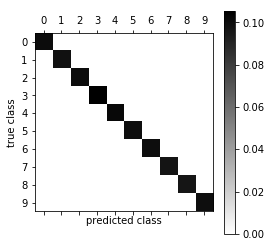

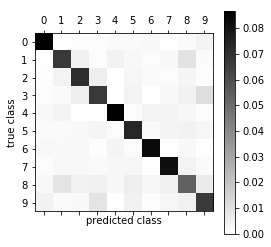

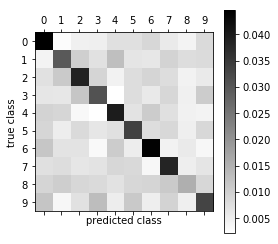

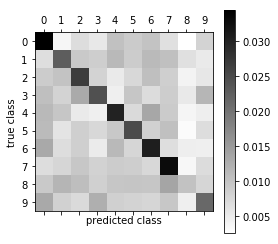

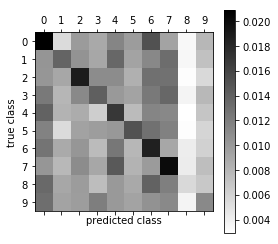

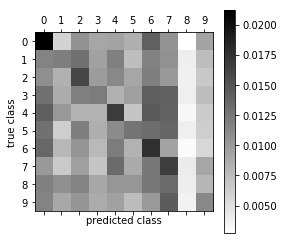

In [236]:
#### Q4 Finally, compute and display the confusion matrix for noise variances sigma^2 = {10,100,500,1000,5000,10000}, 
#       each time averaging over 10,000 samples. How does the confusion matrix change? Why?

sigma_2 = np.array([10,100,500,1000,5000,10000])
sample_size = 10000

for sigma in range(0,sigma_2.size):
    cov = np.dot(sigma_2[sigma],np.eye(mu_flattened[0,:].shape[0])) # Covaraince
    conf_matrix = np.zeros((10,10))
    cmprWithMean = 0
    closeness2mean = np.zeros((1,10))
    
    for k in range(0, sample_size):
        rand_sample_index = np.random.choice(10,size=1) #choose the hypothesis to draw the sample from (assumes uniform distribution over 10 classes)
        y = np.random.multivariate_normal(mu_flattened[int(rand_sample_index),:],cov) #draw a sample from the class index given by random.choice
    
        for classes in range (0,10):
            cmprWithMean = np.square(np.linalg.norm(y-mu_flattened[classes,:])) #how far is y from the the mean of class=classes
            closeness2mean[0,classes] = cmprWithMean
    
        #maximum likelihood detector
        maxLikelihood_idx = np.argmin(closeness2mean)
    
        #Confusion matrix
        conf_matrix[rand_sample_index,maxLikelihood_idx] = conf_matrix[rand_sample_index,maxLikelihood_idx] +1

    normalized_confmtrx = conf_matrix/sample_size
    print(normalized_confmtrx)
    
    plt.matshow(normalized_confmtrx, cmap=plt.cm.gray_r) 
    plt.colorbar()
    tick_marks = np.arange(0,10)
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)
    plt.ylabel('true class')
    plt.xlabel('predicted class')

In [ ]:
# As sigma increases, the diagonal elements of the confusion matrices become less dominant compared to their off-diagonal elements.
# This is because higher sigma means there is more noise. The detector has hard time making correct decisions when tehre is more noise.